In [9]:
import numpy as np
from skimage import feature, color, img_as_float
import matplotlib.pyplot as plt
from skimage.feature import blob_dog

def extract_features(image):
    # Check if the image has the shape (2, height, width)
    if image.ndim == 3 and image.shape[0] == 2:
        # Average the two channels to create a single channel representation
        gray_image = np.mean(image, axis=0)
    else:
        raise ValueError("Input image must have shape (2, height, width)")

    # Extract HOG features
    hog_features, hog_image = feature.hog(gray_image, 
                                           orientations=9, 
                                           pixels_per_cell=(8, 8),
                                           cells_per_block=(2, 2), 
                                           visualize=True)

    # Extract LBP features
    lbp = feature.local_binary_pattern(gray_image, P=8, R=1, method='uniform')
    (lbp_hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, 11), range=(0, 10))
    lbp_hist = lbp_hist.astype("float")
    lbp_hist /= lbp_hist.sum()  # Normalize the histogram

    # Combine HOG and LBP features into a single feature vector
    features = np.hstack((hog_features, lbp_hist))

    return features, gray_image, hog_image, lbp

def detect_blobs(gray_image):
    # Detect blobs using the Difference of Gaussians method
    blobs = blob_dog(gray_image, max_sigma=30, threshold=0.1)

    return blobs

def visualize_features(gray_image, hog_image, lbp, blobs):
    plt.figure(figsize=(12, 8))

    # Original Grayscale Image
    plt.subplot(1, 4, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')

    # HOG Features
    plt.subplot(1, 4, 2)
    plt.imshow(hog_image, cmap='gray')
    plt.title('HOG Features')
    plt.axis('off')

    # LBP Features
    plt.subplot(1, 4, 3)
    plt.imshow(lbp, cmap='gray')
    plt.title('LBP Features')
    plt.axis('off')

    # Blobs on Original Image
    plt.subplot(1, 4, 4)
    plt.imshow(gray_image, cmap='gray')
    plt.scatter(blobs[:, 1], blobs[:, 0], s=blobs[:, 2] * 20, edgecolor='red', facecolor='none')
    plt.title('Detected Blobs')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


In [10]:
import glob
images = glob.glob('dataset/1/EPSILON/*.npy')

/home/bryan/miniconda3/envs/jupyter/lib/python3.12/site-packages/skimage/feature/texture.py:360: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


Extracted Features Shape: (8110,)


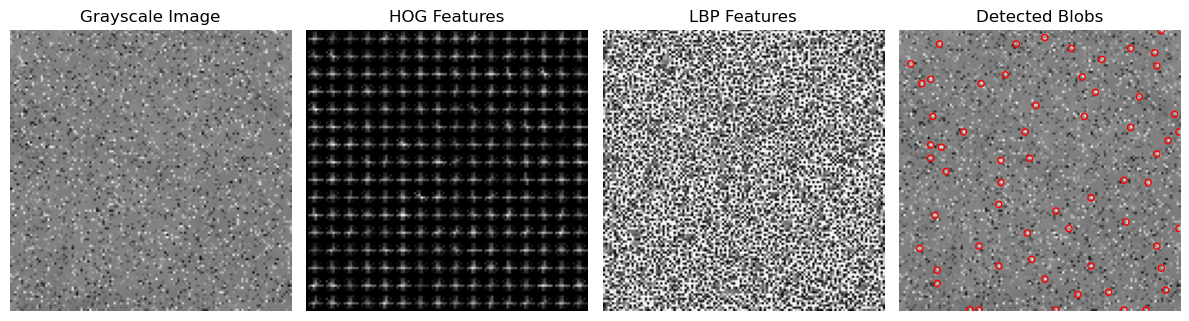

Extracted Features Shape: (8110,)


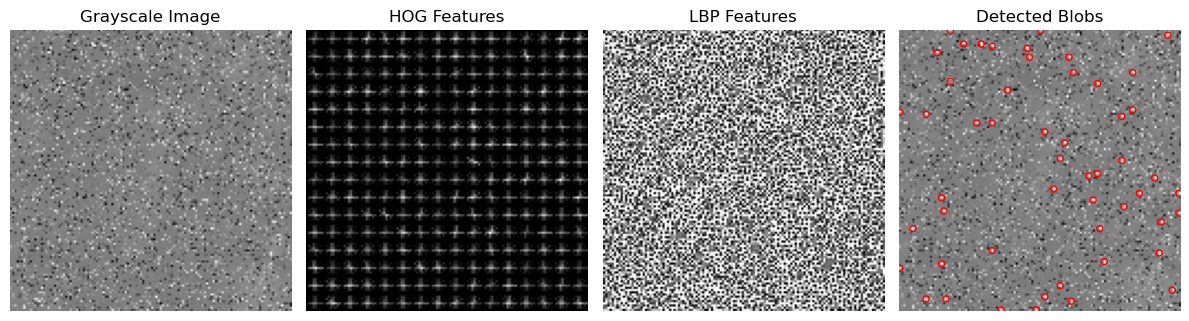

Extracted Features Shape: (8110,)


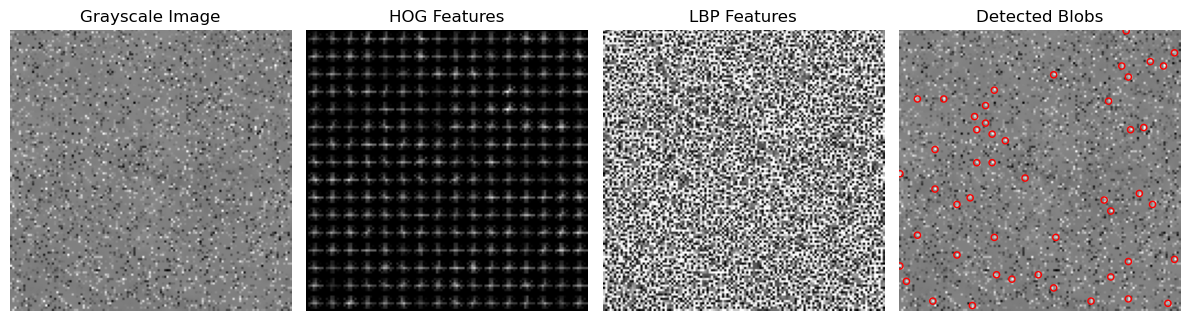

Extracted Features Shape: (8110,)


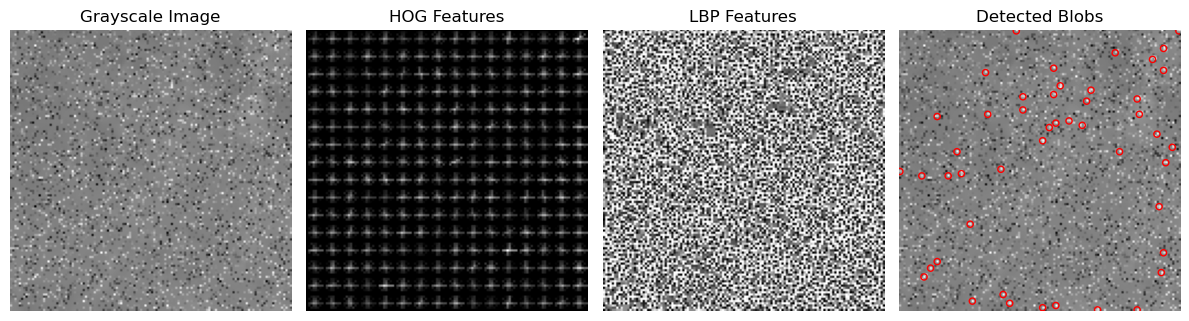

Extracted Features Shape: (8110,)


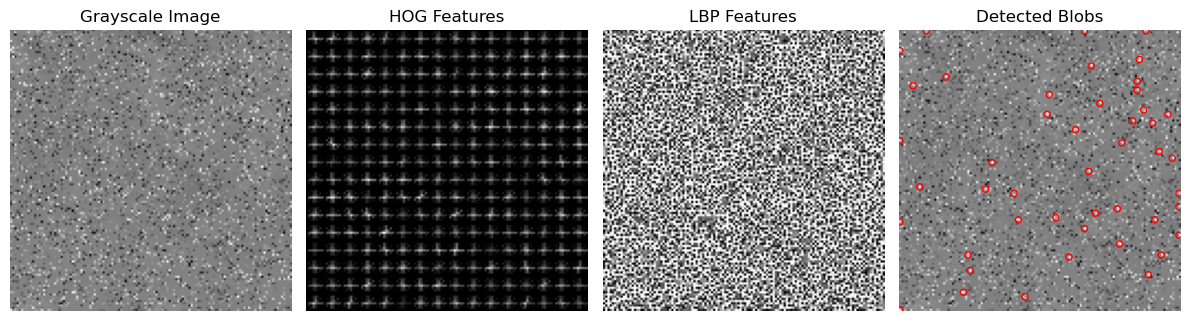

Extracted Features Shape: (8110,)


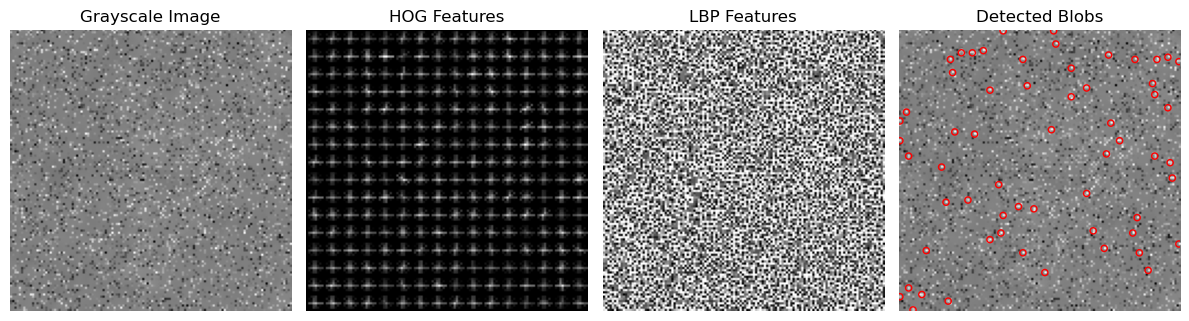

Extracted Features Shape: (8110,)


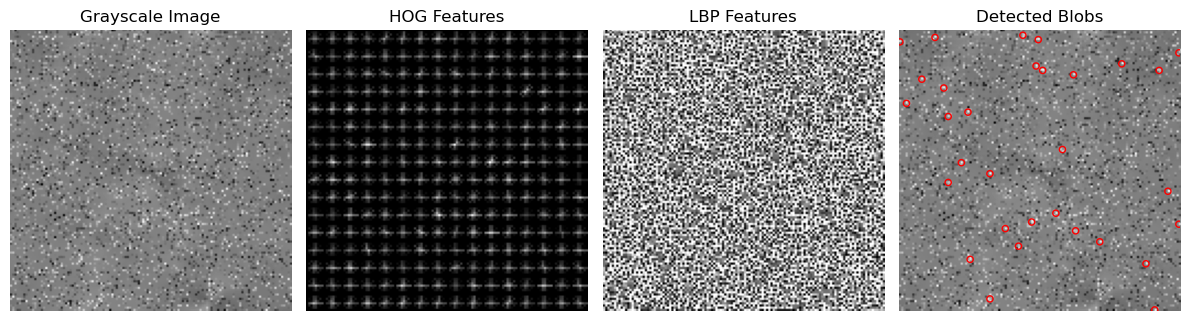

Extracted Features Shape: (8110,)


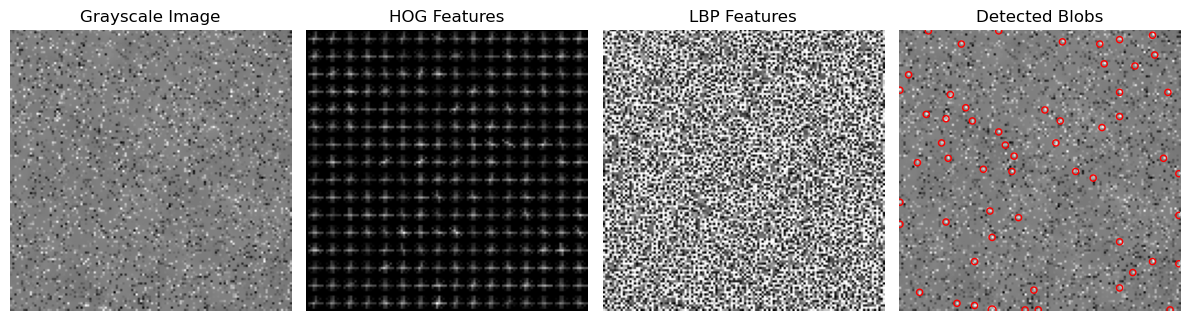

Extracted Features Shape: (8110,)


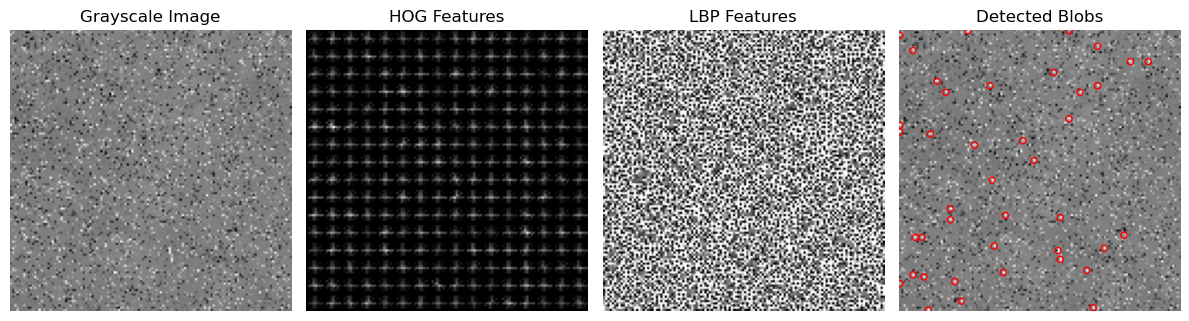

Extracted Features Shape: (8110,)


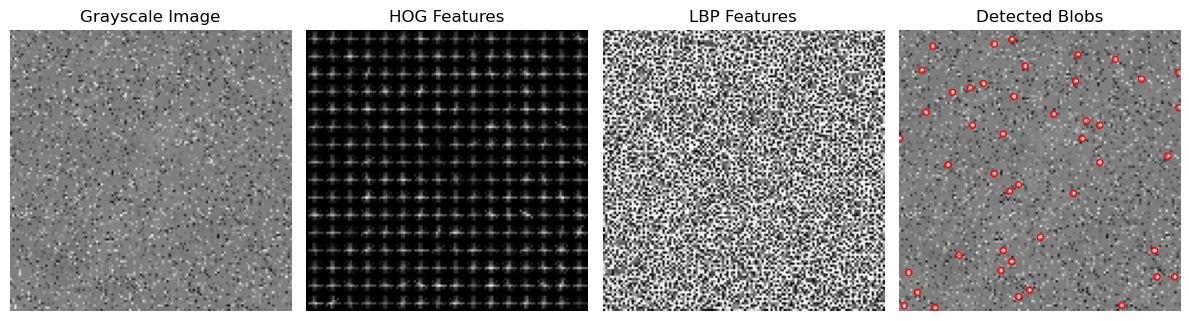

In [13]:
# Load your image (replace 'your_image.png' with your image path)


for i in range(10):
    image = np.load(images[i])[:2,:,:]
    # Extract features
    features, gray_image, hog_image, lbp = extract_features(image)

    print("Extracted Features Shape:", features.shape)

    # Detect blobs
    blobs = detect_blobs(gray_image)

    # Visualize the features and blobs
    visualize_features(gray_image, hog_image, lbp, blobs)